# Explore

In [1]:
import re
import unicodedata
from wordcloud import WordCloud
import pandas as pd
import nltk
import env

import matplotlib.pyplot as plt
import seaborn as sns
import wrangle

In [2]:
train, val, test = wrangle.wrangle_readmes()

Returning Python and Java-script data


In [3]:
# get data
df = train[["language","lemmatized"]]
df.head()

,language,lemmatized
88,Python,thrilled announce localstack 22 brings new fea...
4,Python,one rule communitywe care break thing playgrou...
13,JavaScript,nodeechonodejs echo server return request data...
10,JavaScript,simple yet flexible javascript charting design...
81,JavaScript,streaming build system gulpautomation gulp too...


**Between JavaScript and Python, which language exhibits greater prevalence within the content of the READMEs?**

Python        67
JavaScript    58
Name: language, dtype: int64
Python        0.536
JavaScript    0.464
Name: language, dtype: float64


<Axes: >

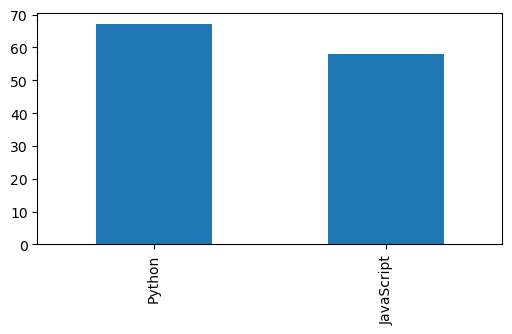

In [4]:
print(df.language.value_counts())
print(df.language.value_counts(normalize=True))
plt.figure(figsize=(6,3))
df.language.value_counts().plot(kind="bar")

**In a compilation of the top 100 most Forked GitHub repositories, what are the five words that demonstrate the highest frequency of occurrence?**

What are the most frequently occuring words?

- The words that appear in legitimate text messages.
- The words that appear in spam text messages.
- All of the words.

In [5]:
py = df.lemmatized[df.language == "Python"]
js = df.lemmatized[df.language == "JavaScript"]
py_js = df.lemmatized
py.head()

88    thrilled announce localstack 22 brings new fea...
4     one rule communitywe care break thing playgrou...
37    face recognition using tensorflow tensorflow i...
38                                         calc_and_win
56    hanlp han language processing english docker p...
Name: lemmatized, dtype: object

Text(0, 0.5, 'frequency')

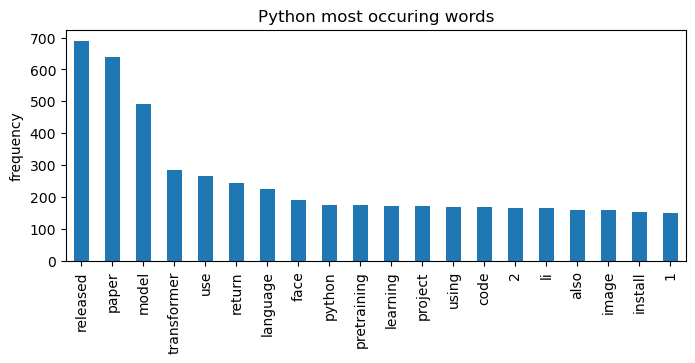

In [6]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(py).split()).value_counts().head(20).plot(kind="bar")
plt.title("Python most occuring words")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

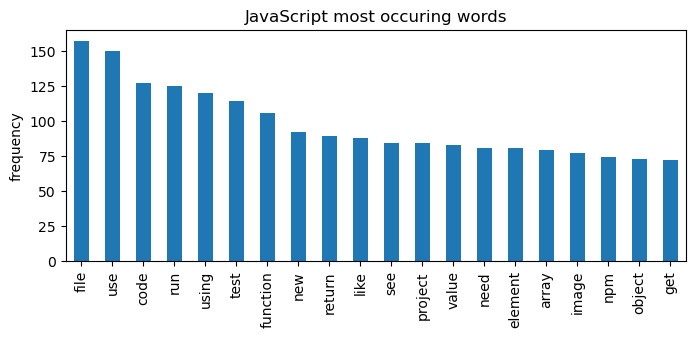

In [7]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(js).split()).value_counts().head(20).plot(kind="bar")
plt.title("JavaScript most occuring words")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

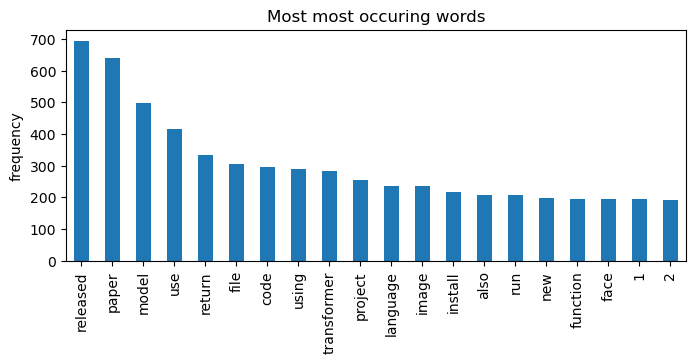

In [8]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(py_js).split()).value_counts().head(20).plot(kind="bar")
plt.title("Most most occuring words")
plt.ylabel("frequency")

**Words in readme that uniqely identify python or javascript**

In [9]:
py_df = pd.Series(" ".join(py).split()).value_counts()
js_df = pd.Series(" ".join(js).split()).value_counts()
all_df = pd.Series(" ".join(py_js).split()).value_counts()

freq_df = pd.concat([py_df, js_df, all_df], axis=1).set_axis(["py", "js", "all"], axis=1)
freq_df = freq_df.fillna(0)
freq_df.head()

,py,js,all
released,690.0,4.0,694
paper,639.0,1.0,640
model,493.0,6.0,499
transformer,284.0,0.0,284
use,267.0,150.0,417


Text(0, 0.5, 'frequency')

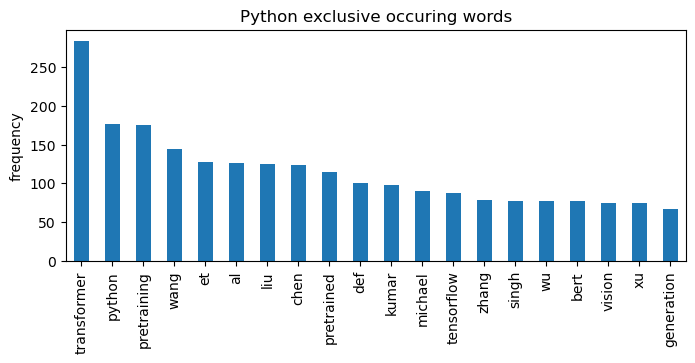

In [10]:
plt.figure(figsize=(8,3))
# words exclusive to python
freq_df["py"][freq_df["js"] == 0].head(20).plot(kind="bar")
plt.title("Python exclusive occuring words")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

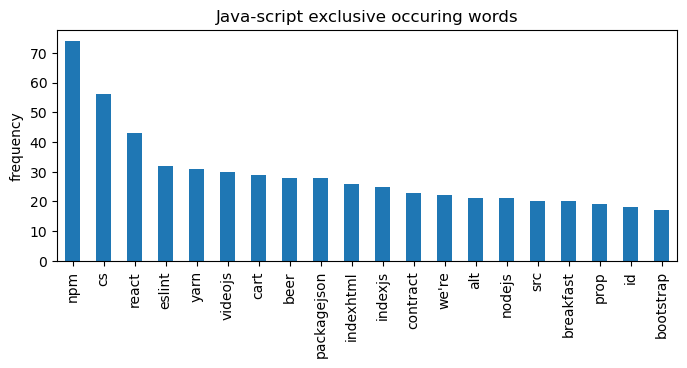

In [11]:
plt.figure(figsize=(8,3))
# words exclusive to python
freq_df["js"][freq_df["py"] == 0].head(20).plot(kind="bar")
plt.title("Java-script exclusive occuring words")
plt.ylabel("frequency")

**Within JavaScript and python code segments, which bigrams, or sequential pairs of words, are commonly encountered?**

In [12]:
py_doc = " ".join(py).split()
js_doc = " ".join(js).split()
all_doc = " ".join(py_js).split()

Text(0, 0.5, '# Occurances')

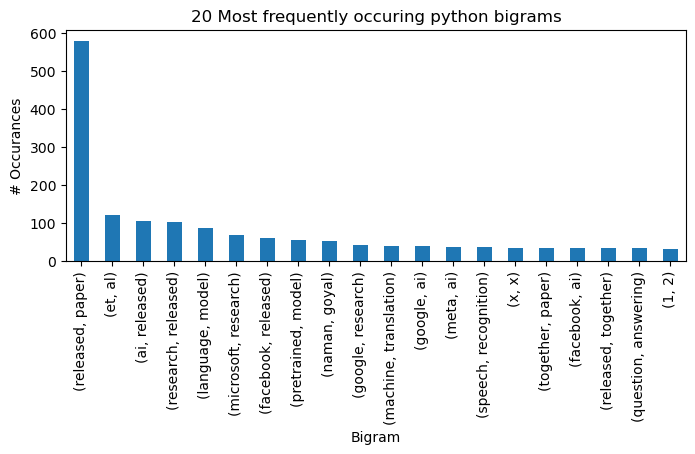

In [13]:
plt.figure(figsize=(8,3))
pd.Series(nltk.ngrams(py_doc, 2)).value_counts().head(20).plot(kind="bar")
plt.title('20 Most frequently occuring python bigrams')
plt.xlabel('Bigram')
plt.ylabel('# Occurances')

Text(0, 0.5, '# Occurances')

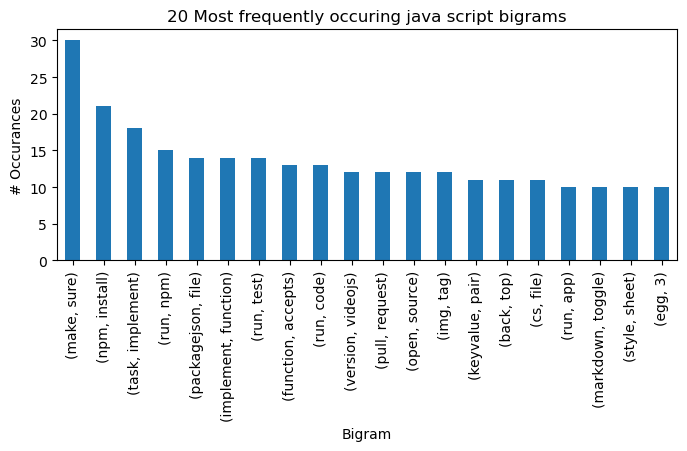

In [14]:
plt.figure(figsize=(8,3))
pd.Series(nltk.ngrams(js_doc, 2)).value_counts().head(20).plot(kind="bar")
plt.title('20 Most frequently occuring java script bigrams')
plt.xlabel('Bigram')
plt.ylabel('# Occurances')

Text(0, 0.5, '# Occurances')

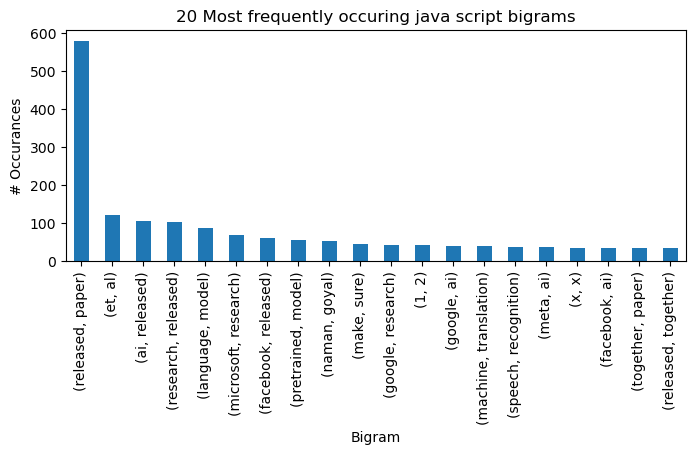

In [15]:
plt.figure(figsize=(8,3))
pd.Series(nltk.ngrams(all_doc, 2)).value_counts().head(20).plot(kind="bar")
plt.title('20 Most frequently occuring java script bigrams')
plt.xlabel('Bigram')
plt.ylabel('# Occurances')